<a href="https://colab.research.google.com/github/luccidomingues/MGLU_StockPicking/blob/main/Prevendo_Valores_de_A%C3%A7%C3%B5es_da_MGLU3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo Valores de Ações da Magalu (MGLU3)
---


Todos os dias, profissionais e entusiastas movimentam bilhões de reais, dólares, libras etc. em todo mundo nas mais variadas bolsas de valores.

Uma **bolsa de valores** é uma espécie mercado onde compradores e vendedores compram e vendem **titulos de ações** de empresas, tornando seu comprador como **acionista** daquela empresa.

Essas ações **flutuam** durante o dia e podem fechar o dia valendo mais ou menos do que no seu inicio.

As maiores empresas do mundo estão em alguma bolsa, seja Facebook, Apple, Microsoft, ou até mesmo no Brasil, Magazine Luiza, Petrobras etc.

![stock](https://cdn.liteforex.com/cache/images/articles-preview-seo-named-images/forex-price-action-strategy.jpg?q=75&amp;w=1000&amp;s=22fcdd0dde01381dc24043b5c6390e4f)

## Sobre o projeto

Nosso intuito é criar um **modelo** de **Machine Learning** capaz de **predizer** o valor de **fechamento** de uma ação.

Aqui utilizaremos **Regressão**, ou seja, nossa saida será um valor continuo predito pelo modelo.

## Checklist 
1. Definição do Problema
2. Obtenção dos Dados
3. Correlações de Features e Classe
4. Machine Learning
5. Validação
6. Testando alterações no modelo

# 1. Definição do Problema

Por as ações moverem tanto valor diariamente, é mais que normal métodos serem desenvolvidos e utilizados para tentar prever o **valor final da ação naquela dia**, pois para alguém ganhar dinheiro, outros têm que perder, então é natural que táticas e estudos sejam criados para tentar prever com a maior precisão possivel o valor final da ação para comprar ou vender as ações.

Vamos explicar melhor. Pense que José é investidor e comprou uma 10 ações da Data Company e cada uma dessas ações valiam 10 reais naquele momentos.

Ao final do dia, se as ações **valorizaram** 2 reais cada, ele terá 120 reais e não mais os 100 iniciais, ou seja, se ele vender a ação ao final do dia ele ganhou 20 reais.

Por outro lado, se as ações **desvalorizaram** 2 reais cada, ao final do dia cada ação vale 8 reais, então as 10 ações vão estar valendo 80 reais, não mais 100 e José perdeu dinheiro.

Hoje, utilizaremos dados da **Petrobras**, empresa estatal brasileira, de economia mista, ou seja, seu capital é composto por recursos públicos e privados e que, segundo a [Uol](https://economia.uol.com.br/noticias/redacao/2019/06/03/novo-estudo-aponta-bradesco-como-a-marca-mais-valiosa-do-brasil.htm) era a oitava maior empresa do Brasil com capital de 2.002 bilhões de dólares em 2019. 

Suas **principais atividades** são exploração, produção, refino, comercialização e transporte de petróleo e gás natural, petroquímica, distribuição de derivados, energia elétrica, bicombustíveis. Também atua com outras fontes de energia renováveis.

Nossos dados vão de 2010 a 2017.

Em nosso modelo as features são:

`Date`: Dia dos dados da ação

`Open`: Preço de abertura da ação naquele dia

`High`: Valor máximo alcançado naquele dia

`Low`: Valor mínimo alcançado naquele dia

`Close`: Fechamento da ação naquele dia

`Volume`: Número de ações negociadas




Além disso criaremos a feature `Variation` para analisar durante aquele dia qual foi a variação dos dados entre fechamento e abertura. 

# 2. Obtenção dos Dados

**Importações**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




# import plotly.graph_objs as go
# import plotly.offline as py
# import plotly
# plotly.offline.init_notebook_mode()
# # plotly para plotar gráficos financeiros
# import datetime

**Carregando e lendo os dados**

In [ ]:
mglu = pd.read_csv('MGLU3.csv')
mglu.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-22,10.7975,10.9950,10.7925,10.9300,10.612300,23985600.0
1,2019-10-23,10.8975,10.9975,10.7300,10.8725,10.556471,32365600.0
2,2019-10-24,10.8725,10.9875,10.7900,10.8125,10.498215,23944400.0
3,2019-10-25,10.8450,10.8750,10.5000,10.5000,10.194798,32608400.0
4,2019-10-28,10.5500,10.7950,10.5125,10.6675,10.357429,42348000.0


**Final do dataset**

In [ ]:
mglu.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2020-10-16,25.760000,26.049999,25.160000,25.870001,25.870001,29939200.0
245,2020-10-19,26.110001,26.299999,25.350000,25.690001,25.690001,36433600.0
246,2020-10-20,25.799999,26.139999,25.650000,26.040001,26.040001,27788700.0
247,2020-10-21,26.000000,26.799999,25.959999,26.219999,26.219999,35433800.0
248,2020-10-22,26.350000,26.400000,26.000000,26.100000,26.100000,22661500.0


**Vamos visualizar algumas informações**

Todas as colunas de 1802 linhas e todas, com exceção da `Date` estão em formatos numéricos.

A primeira coisa a fazer é transformar `Date` em formato *datetime*.

In [ ]:
mglu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.7+ KB


**Transformando a coluna `'Date'` de *object* para *datetime***

In [ ]:
# transformando
mglu['Date'] = pd.to_datetime(mglu['Date'])
# visualizando se realmente foi transformada
mglu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       248 non-null    float64       
 2   High       248 non-null    float64       
 3   Low        248 non-null    float64       
 4   Close      248 non-null    float64       
 5   Adj Close  248 non-null    float64       
 6   Volume     248 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.7 KB


**Criando coluna `Variation` entre abertura e fechamento**

Veja as variações como flutuam, enquanto os dados *0* e *4* têm quedas bruscas, o dado *3* tem uma pequena queda e os dados *1* e *2* sobem, mas muito pouco.

In [ ]:
mglu['Variation'] = mglu['Close'].sub(mglu['Open'])
mglu.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Variation
0,2019-10-22,10.7975,10.9950,10.7925,10.9300,10.612300,23985600.0,0.1325
1,2019-10-23,10.8975,10.9975,10.7300,10.8725,10.556471,32365600.0,-0.0250
2,2019-10-24,10.8725,10.9875,10.7900,10.8125,10.498215,23944400.0,-0.0600
3,2019-10-25,10.8450,10.8750,10.5000,10.5000,10.194798,32608400.0,-0.3450
4,2019-10-28,10.5500,10.7950,10.5125,10.6675,10.357429,42348000.0,0.1175


**Plotando os preços de Outubro de 2019 até Outubro de 2020**

Já conseguimos ver que, embora os dados tenham o movimento comum de ter picos e vales, ou seja, subidas e descidas, no geral, com o passar dos anos os dados da petrobras vêm caindo, ou seja, a empresa vem desvalorizando. 

Muito disso tem a ver com os esquema de propinas e corrupção que "estorou" na midia nos últimos anos e ainda vêm repercutindo.

Text(0.5, 0, 'Data')

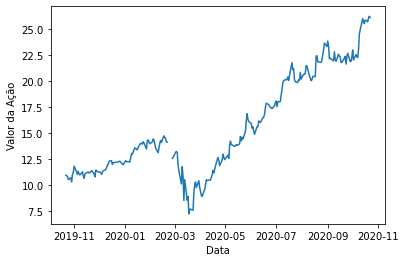

In [ ]:
# x1 = mglu.Date
# y1 = mglu.Close
# data = [go.Scatter(x=x1, y=y1)] # dispersão ao longo do tempo
# layout = go.Layout(
#     xaxis=dict(
#         range=['22-10-2019','22-10-2020'], # faixa de data
#         title='Ano'              
#     ),
#     yaxis=dict(
#         range=[min(x1), max(y1)], # abertura e fechamento das datas
#         title='Valor da Acao'
#     ))
# fig = go.Figure(data = data, layout = layout) # objeto figura com data e layout
# py.iplot(fig)

plt.plot(mglu['Date'],mglu['Close'])
plt.ylabel('Valor da Ação')
plt.xlabel('Data')

Text(0.5, 0, 'Data')

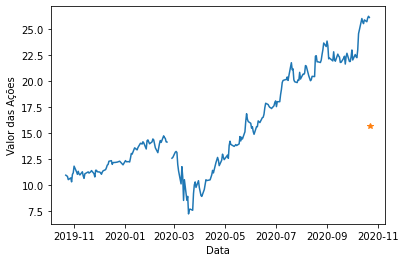

In [ ]:
import numpy as np


media_acoes = np.mean(mglu['Close'])

dt_acoes = mglu['Date'][1]-mglu['Date'][0]

plt.plot(mglu['Date'],mglu['Close'])
plt.plot(mglu.iloc[-1,0]+dt_acoes,media_acoes, '*')
plt.ylabel("Valor das Ações")
plt.xlabel("Data")



In [ ]:
mglu.shape

(249, 8)

In [ ]:
media_tres_pontos = np.mean(mglu['Close'][246:248])

Text(0.5, 0, 'Data')

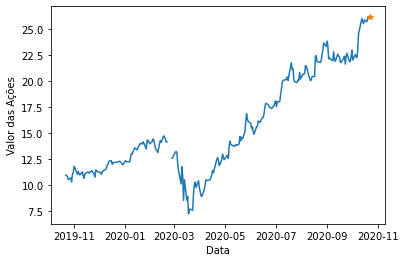

In [ ]:
dt_acoes = mglu['Date'][1]-mglu['Date'][0]

plt.plot(mglu['Date'],mglu['Close'])
plt.plot(mglu.iloc[-1,0]+dt_acoes,media_tres_pontos, '*')
plt.ylabel("Valor das Ações")
plt.xlabel("Data")

In [ ]:
media_movel = mglu.rolling(5).mean()

media_movel['Date'] = mglu['Date']
media_movel.head()

,Open,High,Low,Close,Adj Close,Volume,Variation,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-22
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-23
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-24
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-25
4,10.7925,10.93,10.665,10.7565,10.443843,31050400.0,-0.036,2019-10-28


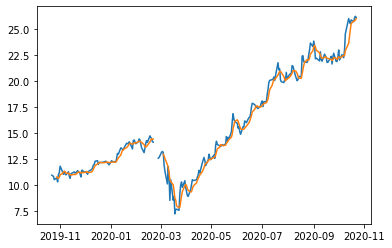

In [ ]:
plt.plot(mglu['Date'],mglu['Close'])
plt.plot(media_movel['Date'],media_movel['Close'])




In [ ]:
!pip install statsmodels==v0.11.0rc2


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_c = seasonal_decompose(mglu['Date'],period=35)

# result_c = seasonal_decompose(mglu.set_index('Date'),period=35)


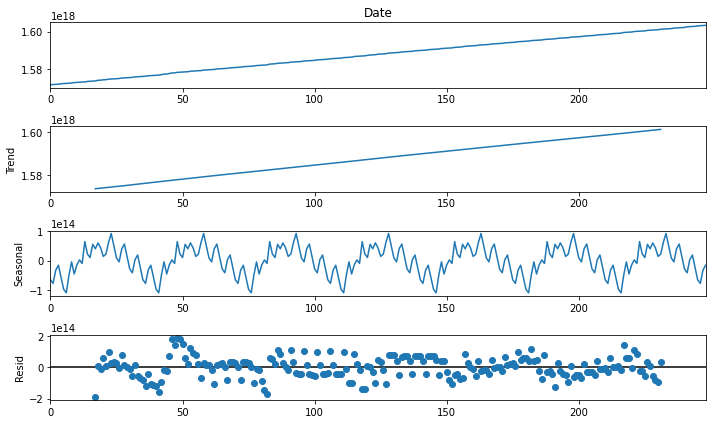

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
result_c.plot();

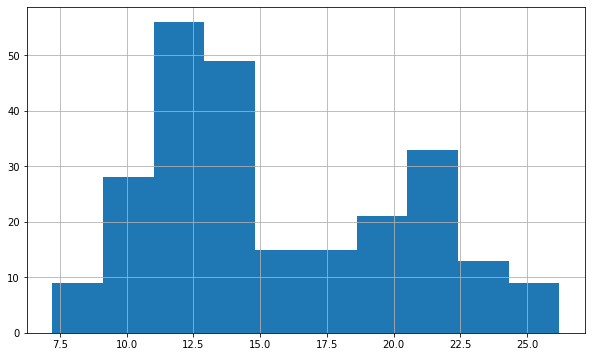

In [ ]:
# Checando a Estacionariedade - talvez essa base não tem Estacionariedade

mglu['Close'].hist()

# Histograma nao tem a forma de sino, forma de Gauge - entao nao teria a Estacionariedade ?!

In [ ]:
# Fazendo um teste de campo com Null - coluna Close - depois trato melhor fazendo a media ou alguma coisa
mglu.update(mglu['Close'].fillna(1))
mglu.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        0
Adj Close    1
Volume       1
Variation    1
dtype: int64

In [ ]:
divide = int(len(mglu)/2)
divide

124

In [ ]:
X = mglu['Close'].values

In [ ]:
C1, C2 = X[0:divide],X[divide:]
C1

array([10.93  , 10.8725, 10.8125, 10.5   , 10.6675, 10.2875, 11.005 ,
       11.16  , 11.7975, 11.2425, 11.01  , 11.3   , 11.05  , 10.9525,
       11.255 , 10.85  , 10.625 , 11.0625, 11.245 , 11.13  , 11.25  ,
       11.3725, 11.075 , 10.76  , 11.4   , 11.4   , 11.2575, 11.23  ,
       11.1475, 11.0175, 11.2225, 11.35  , 11.4625, 11.65  , 11.895 ,
       11.9575, 12.2675, 12.325 , 11.97  , 12.1325, 12.155 , 12.1475,
       12.185 , 12.2725, 12.1825, 11.925 , 12.3325, 12.2225, 12.2325,
       12.1975, 12.5725, 13.02  , 12.95  , 13.5575, 13.5   , 13.415 ,
       13.365 , 13.5875, 14.    , 13.9775, 13.9225, 14.145 , 14.0375,
       13.45  , 14.2475, 14.3225, 14.125 , 13.95  , 14.1325, 14.415 ,
       14.325 , 13.9575, 13.5575, 13.095 , 13.5675, 13.985 , 14.2625,
       14.0825, 14.7125, 14.555 , 14.465 , 14.135 , 14.1125,  1.    ,
       12.5625, 12.63  , 13.1375, 13.2125, 13.1125, 11.9475, 11.3325,
       10.09  , 11.7475, 10.77  ,  8.5   , 10.5   ,  8.5175,  8.8925,
        7.2025,  7.6

In [ ]:
C1.mean()

11.677318548387099

In [ ]:
C2.mean()

19.43130008

In [ ]:
C1.var()

3.74543267876886

In [ ]:
C2.var()

13.1378046743523

In [ ]:
# Teste ADF, outra forma de checar a Estacionariedade

from statsmodels.tsa.stattools import adfuller

In [ ]:
resultado = adfuller(mglu['Close'].values)

In [ ]:
# Quanto mais negativo o numero for mais certeza temos que a serie é Estacionária. No caso tivemos um valor positivo, a serie não é Estacionária
print('Estatística ADF',resultado[0])

Estatística ADF 0.5928930187026704


In [ ]:
# Outro teste para checar se a serie é Estacionária, se for menor que 0,05 é Estacionária.
# Teste de hipótese
print('p-valor: %f' % resultado[1])

p-valor: 0.987439


In [ ]:
# Previsão por suavização - Suavização exponencial

mglu = mglu.set_index('Date')
mglu

KeyError: ignored

**Visualizando em Candlesticks**

Os *candlesticks* são gráficos do tipo vela, por isso o *candle*.

* Candlestick de **Alta**:
    * São os **verdes** e eles têm inicio na parte de baixo onde se encontra o valor de abertura e termina em cima onde se tem o valor de fechamento.
    * As linhas finas embaixo e em cima do corpo do candle, que corresponderiam às chamas de uma vela, são os valores de, embaixo de minimo, em cima de máximo.
    
* Candlestick de **Baixa**:
    * São os **vermelhos** e eles têm inicio na parte de cima onde se encontra o valor de abertura e termina embaixo onde se tem o valor de fechamento.
    * As linhas finas embaixo e em cima do corpo do candle, que corresponderiam às chamas de uma vela, são os valores de, embaixo de minimo, em cima de máximo.

In [ ]:
dataset2 = dataset.head(7) # apenas as 7 primeiras linhas
dados = go.Candlestick(x=dataset2.Date, # x= data ou tempo
                       open=dataset2.Open, # abertura
                       high=dataset2.High, #máxima
                       low=dataset2.Low, #minima
                       close=dataset2.Close, # fechamento
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

**Visualizando precos em formato de candles dos últimos 6 meses**

Dá para definir uma faixa menor, dá zoom etc, através da barra inferior.

In [ ]:
dataset2 = dataset.head(180)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

**Plotando a variação no período**

O intuito aqui é somente ver se há algum padrão, o que parece não haver, por estar com valores oscilantes e muito ruidosos.

In [ ]:
%matplotlib notebook
import matplotlib.dates as mdates
import datetime as dt
x = dataset['Date']
y = dataset['Variation']
plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)
plt.show();

# 3. Correlações de Features e Classe

Não é dificil encontrar em dados financeiros, alguns tipos de correlações, isso por algo bem simples: O volume de venda e compra é bastante alto diariamente, então dificilmente haverá algum tipo de variação onde o preço de abertura não estará diretamente relacionado ao preço de fechamento, por exemplo, a não ser que naquele dia estoure algum escândalo muito grande que arrisque a continuidade da empresa em seu ramo, ai sim as pessoas começariam a vender suas ações e elas despencariam.

**Atribuindo a variável *dataset* à variável *treino***

Para manter os dados originais.

In [ ]:
treino = dataset

**Plotando a dispersão entre o preço de abertura (Open) e fechamento (Close) dos últimos 100 dias**

Correlação positiva.

In [ ]:
%matplotlib notebook
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de abertura')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show();

**Plotando a dispersão entre o preço de máxima (high) e fechamento (Close) dos últimos 100 dias**

Correlação Positiva.

In [ ]:
%matplotlib notebook
x = treino.High[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco da maxima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show();

**Plotando a dispersão entre o preço de mínima(Low) e fechamento (Close) dos últimos 100 dias**

Correlação Positiva.

In [ ]:
%matplotlib notebook
x = treino.Low[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de Minima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show();

**Plotando a dispersão entre o Volume e fechamento (Close) dos últimos 100 dias**

Não há correlação nenhuma.

In [ ]:
%matplotlib notebook
x = treino.Volume[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show();

**Vamos visualizar os dados antes de separá-los**

In [ ]:
treino.head()

**Algumas considerações**
* As variáveis do modelo serão:
    * 'Open','High','Low' e 'Volume'
* A *Variation* não será passada por ser variação de fechamento e abertura
* *Close* não é algo que se tem no cenário real, é o que se quer prever
* *Date* não é relevante, pois o que nos interessa é traçar relações entre volume, abertura, fechamento etc. Além de a Regressão Linear não aceitar datetime

In [ ]:
# variaveis a serem utilizadas no modelo
features = ['Open','High','Low','Volume']
# separando os dados de treino
treino = treino[features]
# pode ser treino = treinofeatures['Open','High','Low','Volume']
# treino é uma cópia do dataframe original
treino.head()

**Criando variável com a classe**

In [ ]:
# criando a variável
y=dataset['Close']
# visualizando 3 primeiras linhas
y.head(3)

# 4. Machine Learning

**Separando os dados**

O padrão do train_test_split para test_size é 0.25.

random_state=42 é só para manter a mesma separação em todas as vezes.

É importante frisar que o número é indiferente, se você passar o valor de 1 ou de 1000 e sempre passar o mesmo valor, você sempre terá a mesma separação de dados.

O *42* é uma convenção *geek* apenas, graças ao *guia do mochileiro das galáxias*.

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino, y, random_state=42)

**Visualizando o dataframe X_treino**

In [ ]:
X_treino.head()

**Visualizando dados de teste**

In [ ]:
X_teste.head()

**Visualizando as classes de treino**

In [ ]:
y_treino.head()

**Visualizando as classes do teste**

In [ ]:
y_teste.head()

**Criando um objeto do tipo LinearRegression**

In [ ]:
lr_model = LinearRegression()

**Treinando o algoritmo**

In [ ]:
lr_model.fit(X_treino,y_treino)

**Visualizando os coeficientes (pesos) do algoritmo**

Interessante observar o valor negativo do peso associado a feature Open (Abertura).

In [ ]:
lr_model.coef_

**Vamos Predizer 10 preços?**

In [ ]:
lr_model.predict(X_teste)[:10]

**Visualizando preços reais dos mesmos dados**

Veja que nosso algoritmo se saiu bem, abaixo vamos ver sua precisão.

In [ ]:
y_teste[:10]

**Vamos plotar os erros?**

Para fins didáticos.

Veja que é razoavelmente baixo.

In [ ]:
erro=pd.DataFrame(y_teste[:10].values).sub(lr_model.predict(X_teste)[:10].reshape(10,-1),axis=1)
print(erro)

**Vamos visualizar graficamente os dados reais com os preditos**

Veja que basicamente não houve erro.

In [ ]:
%matplotlib notebook
# Armazenando dados preditos em dataframe.
predicoes = pd.DataFrame(lr_model.predict(X_teste)[:10])

# Armazenando dados reais em dataframe.
y_teste2= pd.DataFrame(y_teste[:10].values)

# Definindo o estilo do gráfico.
plt.style.use("ggplot")

# Definindo o título de eixos do gráfico.
plt.xlabel('Preços')
plt.ylabel('Indice')
plt.title('Precos Reais vs Predições')

# Ordenando os valores e plotando as linhas
plt.plot(predicoes.sort_values(by=0),predicoes.index)
plt.plot(y_teste2.sort_values(by=0),y_teste2.index)
# o +15 é pra o as linhas não ficarem sobrepostas, pois elas são muito parecidas graças ao erro muito pequeno

# Definindo legenda do gráfico
plt.legend(['Predições','Preços Reais']);

**Mesmo gráfico porém com as linhas separadas**

Para isso, no segundo plot fiz um soma dos dados por 15, apenas para avançar a linha no gráfico.

In [ ]:
%matplotlib notebook
# Armazenando dados preditos em dataframe. + 15 para melhorar a visualização
predicoes = pd.DataFrame(lr_model.predict(X_teste)[:10])

# Armazenando dados reais em dataframe.
y_teste2= pd.DataFrame(y_teste[:10].values)

# Definindo o estilo do gráfico.
plt.style.use("ggplot")

# Definindo o título de eixos do gráfico.
plt.xlabel('Preços')
plt.ylabel('Indice')
plt.title('Precos Reais vs Predições')

# Ordenando os valores e plotando as linhas
plt.plot(predicoes.sort_values(by=0),predicoes.index)
plt.plot(y_teste2.sort_values(by=0)+15,y_teste2.index)
# o +15 é pra o as linhas não ficarem sobrepostas, pois elas são muito parecidas graças ao erro muito pequeno

# Definindo legenda do gráfico
plt.legend(['Predições','Preços Reais']);

# 5. Validação

Vamos utilizar apenas o **Erro médio** e a **Raiz quadrada do erro-médio** para visualizar,

Veja que continuam baixos os erros.

**mean_squared_error** 

Significa o erro médio.

Quanto mais próximo de 0 melhor.

In [ ]:
mean_squared_error(y_teste, lr_model.predict(X_teste))

**RMSE - Root Mean Square Error**

Significa Raiz quadrada do erro-médio.

Quanto mais próximo de 0 melhor, também.

Utiliza unidades dependentes.

In [ ]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

**Outra forma de obter o rmse**

In [ ]:
from math import sqrt
RMSE2 = sqrt(mean_squared_error(y_teste, lr_model.predict(X_teste)))
RMSE2

# 6. Testando alterações no modelo

## Somente 'Open' e High'

**Instanciando o algoritmo**

In [ ]:
lr_model2 = LinearRegression()

**Separando os dados**

In [ ]:
features = ['Open','High']
treino2 = treino[features]

**Visualizando dados de features**

In [ ]:
treino2.head()

**Separando os dados 75% treino e 25% teste**

Perceba que estou passando o mesmo *random_state=42* para manter a mesma divisão de dados e assim conseguir avaliar de uma maneira correta os modelos.

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino2, y, random_state=42)

**Treinando o algoritmo**

In [ ]:
lr_model2.fit(X_treino,y_treino)

**Imprimindo os pesos**

Veja que *'Open'* continua negativo.

In [ ]:
lr_model2.coef_

**Validando o modelo com o RMSE**

0.24 é maior que 0.15, logo piorou o modelo.

In [ ]:
RMSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))**0.5
RMSE

## Somente 'Open' e High' com normalização

**Instanciando o algoritmo**

In [ ]:
lr_model3 = LinearRegression(normalize=True)

**Separando os dados**

In [ ]:
features = ['Open','High']
treino3 = treino[features]

**Visualizando os dados**

In [ ]:
treino3.head()

**Separando os dados 75% treino e 25% teste**

Passando o mesmo *random_state=42)*.

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino3, y, random_state=42)

**Treinando o algoritmo**

In [ ]:
lr_model3.fit(X_treino,y_treino)

**Imprimindo os pesos**

In [ ]:
lr_model3.coef_

**Validando o modelo com o RMSE**

Piora (muito pouco) o modelo.

In [ ]:
RMSE = mean_squared_error(y_teste, lr_model3.predict(X_teste))**0.5
RMSE


**Deve-se** testar de outros modos, ex.: alterando as colunas e os parâmetros.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>